In [5]:
%matplotlib inline

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

from skimage.morphology import medial_axis

import cv2 as cv

from skimage.morphology import thin


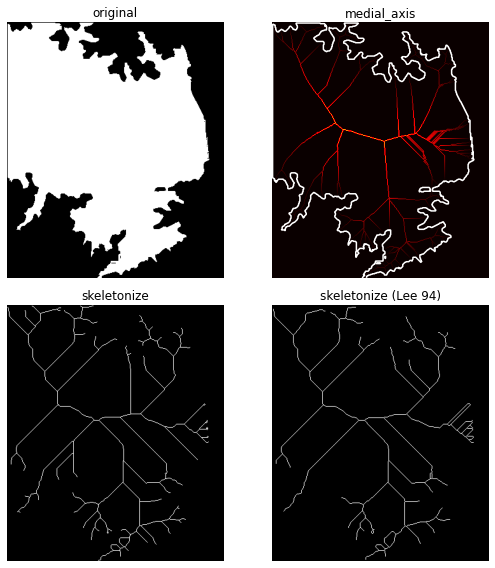

0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.      

In [16]:
# Generate the data
#blobs = data.binary_blobs(200, blob_size_fraction=.2, volume_fraction=.35, seed=1)

#read 3D rbg image as 2D greyscale nparray
blobs = cv.imread(cv.samples.findFile("../Lake_Murray_Map/SouthEastCorner_BW_bianary.png"),0) 
# last parameter 0 = greyscale 1 = color -1 = unchanged 

#convert data from int to np bool 
blobs = blobs > 127

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='hot')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

cv.imwrite('_medial_axis.png', dist_on_skel * 30)
cv.imwrite('_skeleton.png', skeleton * 255)
cv.imwrite('_skeleton_lee94.png', skeleton_lee )

print(dist_on_skel.shape)
for i in dist_on_skel:
    print(i)

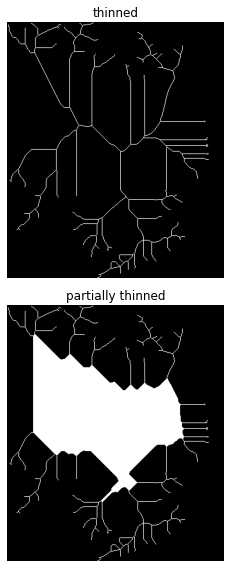

True

In [10]:
thinned = thin(blobs)
thinned_partial = thin(blobs, max_iter=40)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey=True)
#fig, axes = plt.subplots(1, 2)
ax = axes.ravel()


ax[0].imshow(thinned, cmap=plt.cm.gray)
ax[0].set_title('thinned')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

fig.tight_layout()
plt.show()

cv.imwrite('_thinned.png', thinned * 255)
cv.imwrite('_thinned_partial.png', thinned_partial * 255)




